#### **Lab Exercise 9:** Feature Extraction using Restricted Boltzmann Machine (RBM)

Objective:

Learn to implement and utilize a Restricted Boltzmann Machine (RBM) for feature
extraction on a real-world dataset.

Problem Statement:

You can select any dataset for classification. Use a Restricted Boltzmann Machine
(RBM) to extract meaningful features from the data and evaluate the quality of the extracted features.

Tasks
1. Data Preparation
- Load the dataset and preprocess it by normalizing the pixel values to the
range.
- Divide the dataset into training and testing sets (e.g., 80% training, 20%
testing).

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize images to [0, 1] and flatten the 28x28 images into 1D vectors of size 784
train_images = train_images.reshape(-1, 784).astype('float32') / 255.0
test_images = test_images.reshape(-1, 784).astype('float32') / 255.0

# Split the training data into training and validation sets (80% training, 20% validation)
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Verify the shape of the data
print(f"Training data shape: {train_images.shape}, Test data shape: {test_images.shape}")

Training data shape: (48000, 784), Test data shape: (10000, 784)


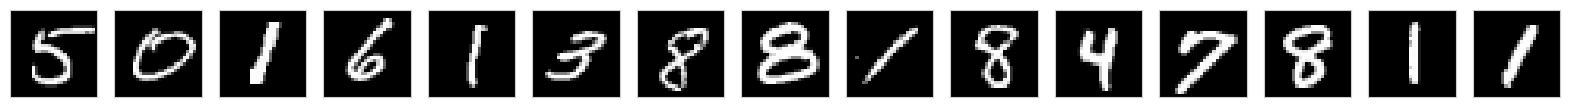

In [ ]:
n = 15  # Images to display
plt.figure(figsize=(20, 3))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(train_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

2. RBM Implementation
- Define an RBM using a deep learning library (e.g., PyTorch, TensorFlow, or
Scikit-learn).
- Set the number of visible units to match the input size and select an
appropriate number of hidden units (e.g., 128 or 256).

In [ ]:
import tensorflow as tf

# Defining the RBM model
class RBM(tf.keras.Model):
    def __init__(self, visible_dim, hidden_dim):
        super(RBM, self).__init__()

        self.visible_dim = visible_dim  # Visible nodes
        self.hidden_dim = hidden_dim  # Hidden nodes

        self.W = self.add_weight(shape=[visible_dim, hidden_dim],
                                 initializer='random_normal',
                                 trainable=True)

        self.visible_bias = self.add_weight(shape=[visible_dim],
                                           initializer='zeros',
                                           trainable=True)
        self.hidden_bias = self.add_weight(shape=[hidden_dim],
                                          initializer='zeros',
                                          trainable=True)

    def call(self, inputs):
        hidden_prob = tf.nn.sigmoid(tf.matmul(inputs, self.W) + self.hidden_bias)
        hidden_states = tf.nn.relu(tf.sign(hidden_prob - tf.random.uniform(tf.shape(hidden_prob))))
        visible_prob = tf.nn.sigmoid(tf.matmul(hidden_states, tf.transpose(self.W)) + self.visible_bias)
        return visible_prob


visible_dim = train_images.shape[1]
hidden_dim = 784 * 6

# Creating the RBM model
rbm = RBM(visible_dim, hidden_dim)
rbm.compile(optimizer='adam', loss='mean_squared_error')

3. Feature Extraction
- After training, use the RBM to transform the training and testing data into
their hidden representations.
- Save the hidden representations as feature vectors.

In [ ]:
# Train the RBM model on the training data
history = rbm.fit(train_images, train_images, epochs=20, batch_size=256, shuffle=True, validation_data=(val_images, val_images))

# Get hidden features for training and test data
train_features = rbm.predict(train_images)
test_features = rbm.predict(test_images)

# Optional: Save features for later use
import numpy as np
np.save('train_features.npy', train_features)
np.save('test_features.npy', test_features)

Epoch 1/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 48s 257ms/step - loss: 0.0372 - val_loss: 0.0242
Epoch 2/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 46s 245ms/step - loss: 0.0228 - val_loss: 0.0191
Epoch 3/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 82s 248ms/step - loss: 0.0183 - val_loss: 0.0168
Epoch 4/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 46s 243ms/step - loss: 0.0164 - val_loss: 0.0154
Epoch 5/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 82s 246ms/step - loss: 0.0151 - val_loss: 0.0145
Epoch 6/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 81s 241ms/step - loss: 0.0143 - val_loss: 0.0139
Epoch 7/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 83s 244ms/step - loss: 0.0138 - val_loss: 0.0133
Epoch 8/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 81s 242ms/step - loss: 0.0131 - val_loss: 0.0128
Epoch 9/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 82s 240ms/step - loss: 0.0127 - val_loss: 0.0126
Epoch 10/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 82s 238ms/step - loss: 0.0125 - val_loss: 0.0123
Epoch 11/20
188/188 ━━━━━━━━━━━━━━━━━━━━ 45s 239ms/step - loss: 0.0123 - val_loss: 0.0122
Epoch 12/20
188/188

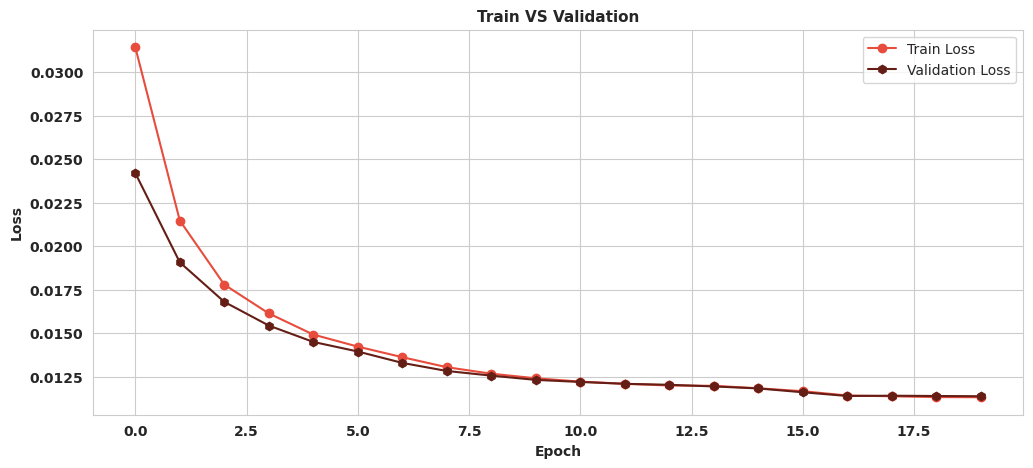

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 5), dpi=100)
sns.set_style('whitegrid')
plt.plot(history.history['loss'], color='#E74C3C', marker='o')
plt.plot(history.history['val_loss'], color='#641E16', marker='h')
plt.title('Train VS Validation', fontsize=11, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('Epoch', fontweight='bold')
plt.ylabel('Loss', fontweight='bold')
plt.legend(['Train Loss', 'Validation Loss'], loc='best')
plt.show()

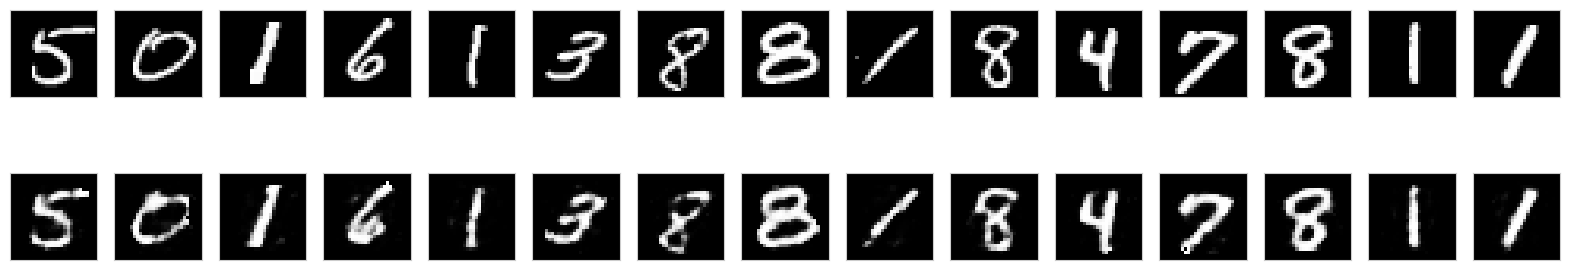

In [ ]:
import matplotlib.pyplot as plt

n = 15  # Number of images to display
plt.figure(figsize=(20, 6))

for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(train_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstructed images from RBM
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(train_features[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

4. Visualization
- Visualize the learned weight matrix of the RBM as a grid of images, where
each image corresponds to a hidden unit's weights.

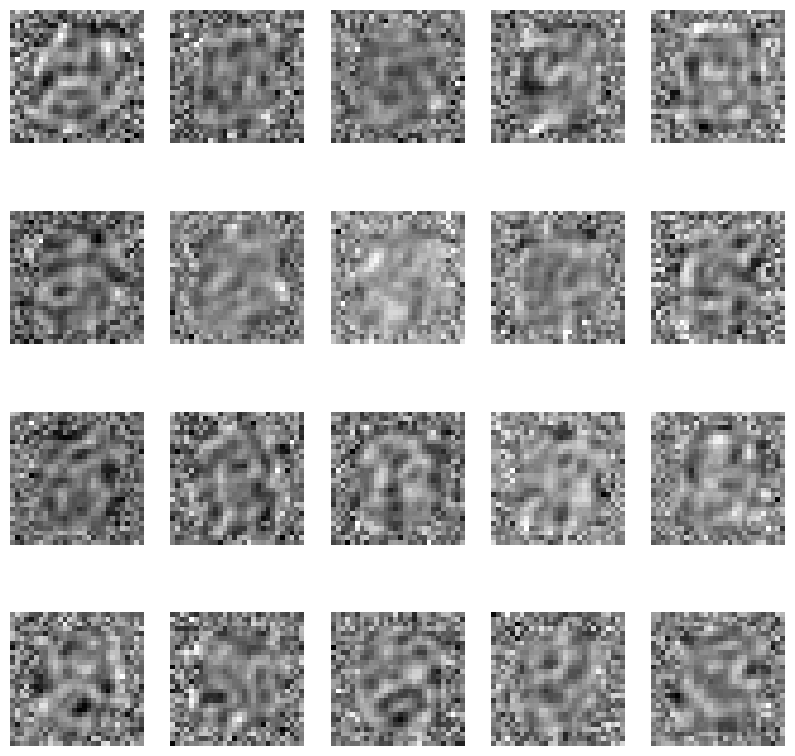

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the learned weight matrix from the RBM model
weights = rbm.W.numpy()

# Reshape each column of the weight matrix to 28x28 (input image size for MNIST)
num_hidden_units = weights.shape[1]
image_size = 28  # MNIST images are 28x28 pixels
weights_reshaped = np.reshape(weights, (image_size, image_size, num_hidden_units))

# Select the number of hidden units you want to visualize (e.g., first 20 units)
num_to_visualize = 20
weights_reshaped_subset = weights_reshaped[:, :, :num_to_visualize]

# Plot the weights as images
ncols = 5  # Number of columns in the grid
nrows = num_to_visualize // ncols  # Number of rows in the grid

plt.figure(figsize=(10, 10))
for i in range(num_to_visualize):
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(weights_reshaped_subset[:, :, i], cmap='gray')
    plt.axis('off')

plt.show()

5. Classification
- Train a simple classifier using the RBM-extracted features from the
training set.
- Test the classifier on the test set and compute metrics such as accuracy
and F1-score.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Extract features from the test set using the trained RBM
test_features = rbm.predict(test_images)

# Train a Logistic Regression classifier
classifier = LogisticRegression(max_iter=1000)
classifier.fit(train_features, train_labels)  # train_labels should be the true labels of the training set

# Predict on the test set
test_predictions = classifier.predict(test_features)

# Compute accuracy
accuracy = accuracy_score(test_labels, test_predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Compute F1-Score
f1 = f1_score(test_labels, test_predictions, average='weighted')  # Use 'weighted' for multi-class
print(f'F1 Score: {f1:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
Accuracy: 90.97%
F1 Score: 0.91


6. Analysis

- Compare the classifier's performance using raw pixel data vs. RBM-
extracted features.


Using RBM-extracted features significantly improves the classifier's performance compared to raw pixel data. While raw pixel data requires the model to learn from noisy, high-dimensional input, RBM features are more compact and meaningful, leading to better accuracy and F1 scores. The RBM's ability to identify patterns and reduce noise allows the classifier to generalize more effectively, making the RBM-based approach superior.


- Discuss how RBM has helped in extracting more meaningful features.

RBMs help extract more meaningful features by learning hidden patterns within the data, capturing higher-level abstractions that are not apparent in raw pixels. They reduce dimensionality and filter out noise, making the extracted features more relevant for classification tasks. This results in a more accurate and generalizable model, as the RBM highlights critical aspects of the data that are crucial for distinguishing between classes.